# Introduction to atmospheric transparency (deprecated)

- author Sylvie Dagoret-Campagne
- creation date : 2023/02/21
- last verification : 2024/04/06

- last verification : 2024/04/06 (on my mac)
- last verification : 2024/04/08 (at usdf)

### Use libraries

- getObsAtmo : for atmosphere emulation : https://github.com/LSSTDESC/getObsAtmo/tree/main
- rubinsimphot : a simplified version of rubin_sim : https://github.com/sylvielsstfr/rubinsimphot

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.colors as colors
import matplotlib.cm as cmx
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm
from matplotlib.gridspec import GridSpec
import pandas as pd

import matplotlib.ticker                         # here's where the formatter is
import os
import re,sys
import pandas as pd

plt.rcParams["figure.figsize"] = (8,6)
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'xx-large'
plt.rcParams['ytick.labelsize']= 'xx-large'


In [2]:
machine_name = os.uname().nodename
path_rubinsimphot = "repos/repos_w_2024_10/rubinsimphot/src"
if 'sdf' in machine_name:
    #machine_name_usdf = 'sdfrome001'
    print("Set environment for USDF")
    newpythonpath = os.path.join(os.getenv("HOME"),path_rubinsimphot)
    sys.path.append(newpythonpath)
elif 'dagoret-nb' in machine_name:
    print("Set environment for USDF Rubin Science Platform")
    newpythonpath = os.path.join(os.getenv("HOME"),path_rubinsimphot)
    sys.path.append(newpythonpath)    
elif 'mac' in machine_name:
    print("Be sure to run this notebook in conda environment named conda_py310")
else:
    print(f"Your current machine name is {machine_name}. Check your python environment")

Set environment for USDF Rubin Science Platform


In [3]:
from scipy import interpolate

## Imports dedicated to this work

- import the atmospheric transparency emulator (instead of using libradtran code).
- import the fit tools

- import rubin sim

### libradtran emulator

In [4]:
from importlib.metadata import version
the_ver = version('getObsAtmo')
print(f"Version of getObsAtmo : {the_ver}")

Version of getObsAtmo : 0.1.1


In [5]:
from getObsAtmo import ObsAtmo
emul = ObsAtmo()

LSST site name validated as LSST observatory


In [6]:
WL = emul.GetWL()

In [7]:
import sys
sys.path.append('../lib')
#import libAtmosphericFit

In [8]:
from libPhotometricCorrections_auxtel import *

LSST site name validated as LSST observatory


In [9]:
from rubinsimphot.phot_utils import Bandpass, Sed
from rubinsimphot.data import get_data_dir

## Configuration

In [10]:
am0 =1.20    # airmass
pwv0 = 5.0  # Precipitable water vapor vertical column depth in mm
oz0 = 300.  # Ozone vertical column depth in Dobson Unit (DU)
tau0= 0.04 # Vertical Aerosol depth (VAOD) 
beta0 = 1.0# Aerosol Angstrom exponent

In [11]:
pc = PhotometricCorrections(am0,pwv0,oz0,tau0,beta0)

/home/d/dagoret/repos/repos_w_2024_10/rubinsimphot/src/rubinsimphot/phot_utils/bandpass.py:68: UserWarning: Wavelength sampling of 1.0 nm is > 0.2 nm, this may not work well with a Sed object. Consider resampling with resample_bandpass method.
  warnings.warn(


Text(0.5, 1.0, 'Standard atmosphere transmission')

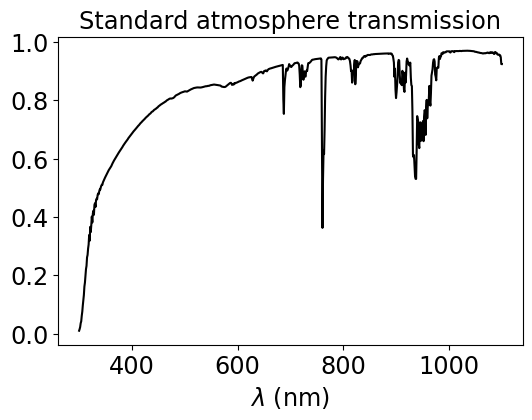

In [12]:
fig, axs = plt.subplots(1,1,figsize=(6,4))
axs.plot(pc.WL,pc.atm_std,'k-')
axs.set_xlabel("$\\lambda$ (nm)")
axs.set_title("Standard atmosphere transmission")

Text(0.5, 1.0, 'Instrument throughput')

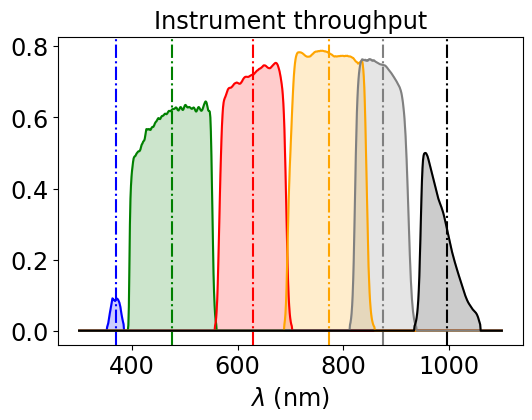

In [13]:
fig, axs = plt.subplots(1,1,figsize=(6,4))
# loop on filter
for index,f in enumerate(filter_tagnames):
    
    axs.plot(pc.bandpass_inst[f].wavelen,pc.bandpass_inst[f].sb,color=filter_color[index]) 
    axs.fill_between(pc.bandpass_inst[f].wavelen,pc.bandpass_inst[f].sb,color=filter_color[index],alpha=0.2) 
    axs.axvline(FILTERWL[index,2],color=filter_color[index],linestyle="-.")
    
axs.set_xlabel("$\\lambda$ (nm)")
axs.set_title("Instrument throughput")

Text(0.5, 1.0, 'Total filter throughput')

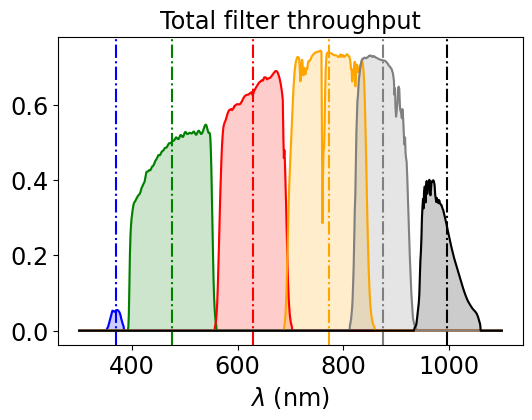

In [14]:
fig, axs = plt.subplots(1,1,figsize=(6,4))
# loop on filter
for index,f in enumerate(filter_tagnames):
    
    axs.plot(pc.bandpass_total_std[f].wavelen,pc.bandpass_total_std[f].sb,color=filter_color[index]) 
    axs.fill_between(pc.bandpass_total_std[f].wavelen,pc.bandpass_total_std[f].sb,color=filter_color[index],alpha=0.2) 
    axs.axvline(FILTERWL[index,2],color=filter_color[index],linestyle="-.")
    
axs.set_xlabel("$\\lambda$ (nm)")
axs.set_title("Total filter throughput")

Text(0.5, 1.0, 'Normalised filter total response $\\phi_b(\\lambda)$')

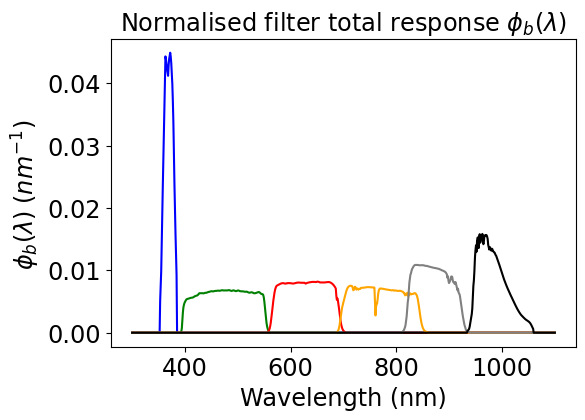

In [15]:
fig, ax = plt.subplots(1,1,figsize=(6,4))
for index,f in enumerate(filter_tagnames):
    ax.plot(pc.WL,pc.phiArray_std[index,:],'-',color=filter_color[index],label = f)
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel("$\phi_b(\lambda)\; (nm^{-1})$ ")
ax.set_title("Normalised filter total response $\phi_b(\lambda)$")

In [16]:
pc.all_II0_std

{'u': 0.0033027396583945995,
 'g': 0.15546341934699381,
 'r': 0.1262512232090045,
 'i': 0.13525749029246867,
 'z': 0.07933749987104793,
 'y': 0.02626911973088666}

In [17]:
pc.all_II1_std

{'u': 0.1156868293375995,
 'g': -0.4780193018950385,
 'r': -1.3168720178413702,
 'i': -4.337849913639505,
 'z': -5.721350911378416,
 'y': -13.54469984345101}

In [18]:
am =2    # airmass
pwv = 5.0  # Precipitable water vapor vertical column depth in mm
oz = 300.  # Ozone vertical column depth in Dobson Unit (DU)
ncomp=1     # Number of aerosol components
tau= 0.04 # Vertical Aerosol depth (VAOD) 
beta = 1.0# Aerosol Angstrom exponent

In [19]:
pc.CalculateObs(am,pwv,oz,tau=tau,beta=beta)

Text(0.5, 1.0, 'Standard atmosphere transmission')

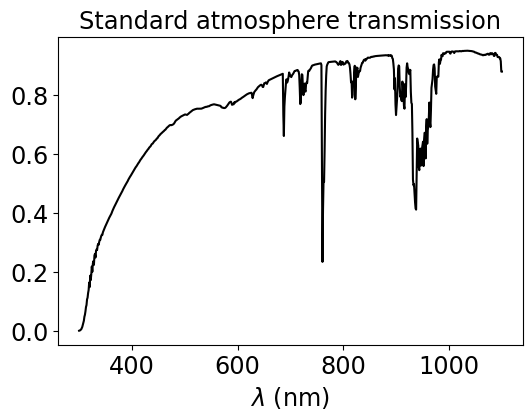

In [20]:
fig, axs = plt.subplots(1,1,figsize=(6,4))
axs.plot(pc.WL,pc.atm_nonstd,'k-')
axs.set_xlabel("$\\lambda$ (nm)")
axs.set_title("Standard atmosphere transmission")

Text(0.5, 1.0, 'Total filter throughput')

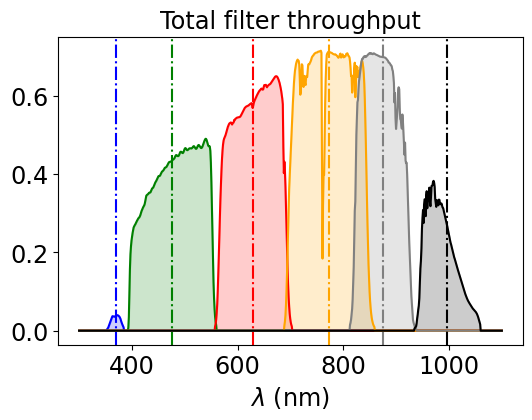

In [21]:
fig, axs = plt.subplots(1,1,figsize=(6,4))
# loop on filter
for index,f in enumerate(filter_tagnames):
    
    axs.plot(pc.bandpass_total_nonstd[f].wavelen,pc.bandpass_total_nonstd[f].sb,color=filter_color[index]) 
    axs.fill_between(pc.bandpass_total_nonstd[f].wavelen,pc.bandpass_total_nonstd[f].sb,color=filter_color[index],alpha=0.2) 
    axs.axvline(FILTERWL[index,2],color=filter_color[index],linestyle="-.")
    
axs.set_xlabel("$\\lambda$ (nm)")
axs.set_title("Total filter throughput")

Text(0.5, 1.0, 'Normalised filter total response $\\phi_b(\\lambda)$')

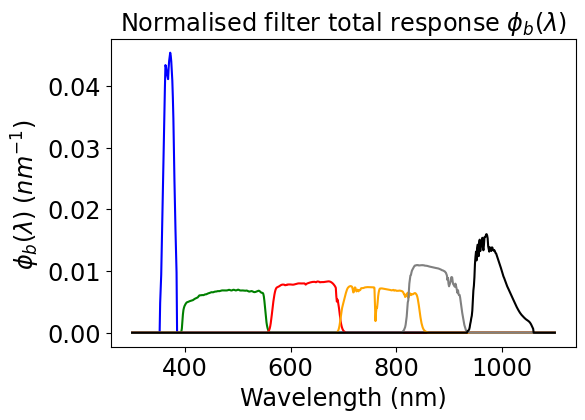

In [22]:
fig, ax = plt.subplots(1,1,figsize=(6,4))
for index,f in enumerate(filter_tagnames):
    ax.plot(pc.WL,pc.phiArray_nonstd[index,:],'-',color=filter_color[index],label = f)
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel("$\phi_b(\lambda)\; (nm^{-1})$ ")
ax.set_title("Normalised filter total response $\phi_b(\lambda)$")

In [23]:
pc.CalculateMultiObs(np.arange(1,2.5,0.2),pwv,oz,tau,beta)

In [24]:
pc.allcollperfilter

{'u': {'II0_nonstd': array([0.00359483, 0.00330274, 0.0030345 , 0.00278816, 0.00256192,
         0.00235433, 0.00216329, 0.00198799]),
  'II1_nonstd': array([0.06932176, 0.11568683, 0.16200584, 0.20827714, 0.2544996 ,
         0.30062158, 0.34678988, 0.39285537]),
  'II0ratio_nonstd': array([1.0884395 , 1.        , 0.91878327, 0.84419699, 0.77569669,
         0.71284101, 0.65499861, 0.60192275]),
  'II1sub_nonstd': array([ 0.04636507,  0.        , -0.04631901, -0.09259032, -0.13881277,
         -0.18493475, -0.23110306, -0.27716854]),
  'ZPT_nonstd': array([24.28516492, 24.19315418, 24.10118688, 24.00926368, 23.91738403,
         23.82563587, 23.73375512, 23.64200607])},
 'g': {'II0_nonstd': array([0.1615488 , 0.15546342, 0.14962372, 0.14401916, 0.13863953,
         0.13347949, 0.12851682, 0.12375573]),
  'II1_nonstd': array([-0.923062  , -0.4780193 , -0.03569927,  0.40386563,  0.84064202,
          1.27416563,  1.70571911,  2.13396246]),
  'II0ratio_nonstd': array([1.03914351, 1.     

In [25]:
pc.allparameters

array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4])

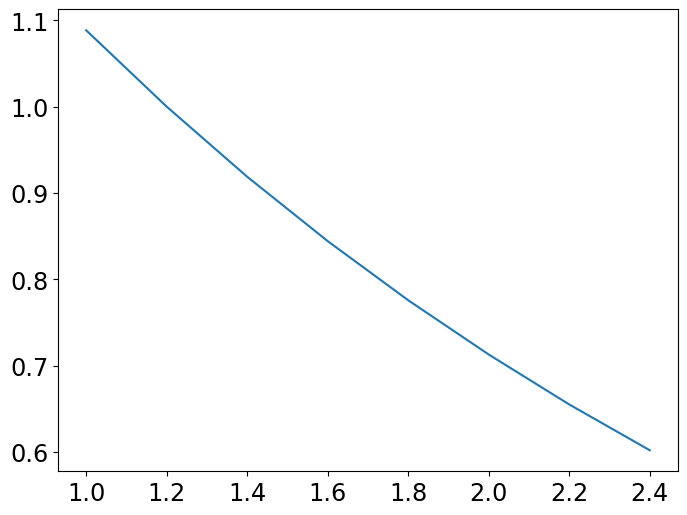

In [26]:
plt.plot(pc.allparameters,pc.allcollperfilter['u']['II0ratio_nonstd'])